In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./GreenHouseGases/PerCap.csv')
df.head()

,Unnamed: 0,Country,Code,Year,Meatpercapkg,GDPpercap,Population,Entity,GHGperCa
0,0,Afghanistan,AFG,2002,13.468704,1189.784668,21000258.0,Afghanistan,0.664137
1,1,Afghanistan,AFG,2003,12.592289,1235.810059,22645136.0,Afghanistan,0.660871
2,2,Afghanistan,AFG,2004,13.298185,1200.277954,23553554.0,Afghanistan,0.624426
3,3,Afghanistan,AFG,2005,13.576787,1286.793701,24411196.0,Afghanistan,0.637321
4,4,Afghanistan,AFG,2006,10.869855,1315.789062,25442946.0,Afghanistan,0.638216


In [3]:
data = df.drop(['Unnamed: 0', 'Entity'], axis=1)
data.head()

,Country,Code,Year,Meatpercapkg,GDPpercap,Population,GHGperCa
0,Afghanistan,AFG,2002,13.468704,1189.784668,21000258.0,0.664137
1,Afghanistan,AFG,2003,12.592289,1235.810059,22645136.0,0.660871
2,Afghanistan,AFG,2004,13.298185,1200.277954,23553554.0,0.624426
3,Afghanistan,AFG,2005,13.576787,1286.793701,24411196.0,0.637321
4,Afghanistan,AFG,2006,10.869855,1315.789062,25442946.0,0.638216


In [4]:
from pycaret.clustering import *
s = setup(data, normalize = True)

,Description,Value
0,Session id,5016
1,Original data shape,"(3286, 7)"
2,Transformed data shape,"(3286, 345)"
3,Numeric features,5
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [5]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [6]:
kmeans = create_model('kmeans', num_clusters=10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0475,23.8400,5.7120,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

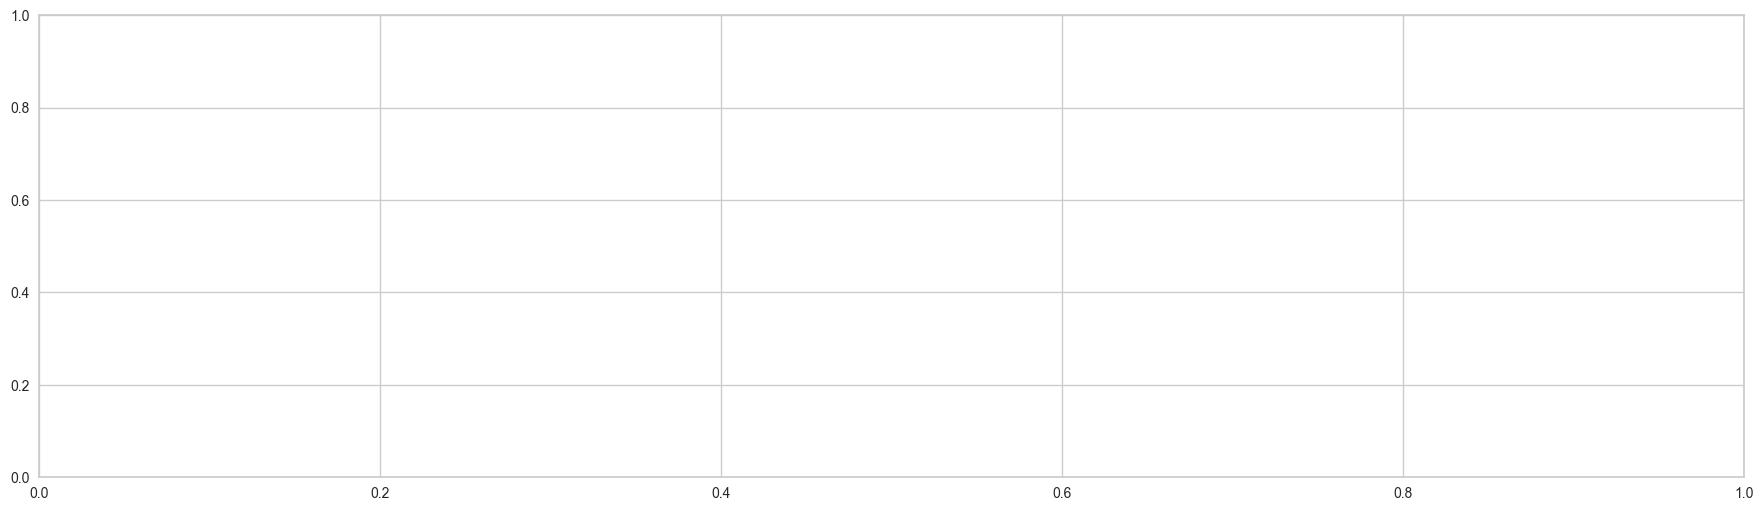

In [7]:
evaluate_model(kmeans)

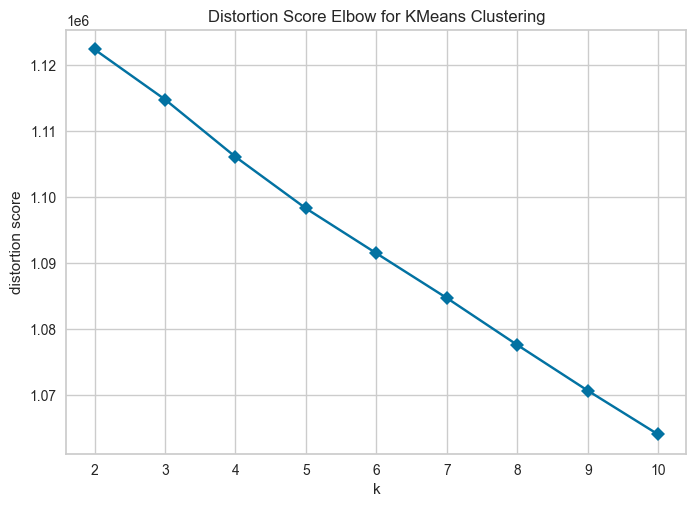

In [8]:
plot_model(kmeans, plot = 'elbow')

In [10]:
# functional API
result = assign_model(kmeans)
result.to_csv('./GreenHouseGases/GHGClusters.csv', index=None)
result

,Country,Code,Year,Meatpercapkg,GDPpercap,Population,GHGperCa,Cluster
0,Afghanistan,AFG,2002,13.468704,1189.784668,21000258.0,0.664137,Cluster 8
1,Afghanistan,AFG,2003,12.592289,1235.810059,22645136.0,0.660871,Cluster 8
2,Afghanistan,AFG,2004,13.298185,1200.277954,23553554.0,0.624426,Cluster 8
3,Afghanistan,AFG,2005,13.576787,1286.793701,24411196.0,0.637321,Cluster 8
4,Afghanistan,AFG,2006,10.869855,1315.789062,25442946.0,0.638216,Cluster 8
...,...,...,...,...,...,...,...,...
3281,Zimbabwe,ZWE,2015,19.110497,3707.622559,14154937.0,3.061969,Cluster 0
3282,Zimbabwe,ZWE,2016,18.519554,3678.217041,14452705.0,8.262096,Cluster 0
3283,Zimbabwe,ZWE,2017,18.290516,3795.642334,14751101.0,8.119214,Cluster 0
3284,Zimbabwe,ZWE,2018,17.130222,3923.030518,15052191.0,8.187654,Cluster 0


In [ ]:
# functional API
predictions = predict_model(kmeans, data = data)
predictions.head()

In [ ]:
save_model(kmeans, 'kmeans_pipelineGHG')

In [ ]:
loaded_model = load_model('kmeans_pipelineGHG')
print(loaded_model)